In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
df=pd.read_csv('drive/My Drive/capstone/IBM_quarterly_financials.csv')

In [ ]:
df = df.T

In [ ]:
df = df.drop('ttm')
df = df.drop('name')
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
06/30/2021,18745000000.00,18745000000.00,9741000000.00,9004000000.00,6857000000.00,5097000000.00,4698000000.00,247000000.00,4451000000.00,399000000.00,1657000000.00,281000000.00,281000000.00,281000000.00,281000000.00,NaN,(178000000.00),2147000000.00,(270000000.00),11000000.00,281000000.00,(326000000.00),(65000000.00),NaN,NaN,NaN,NaN,NaN,(261000000.00),1552000000.00,227000000.00,1325000000.00,1325000000.00,1325000000.00,1325000000.00,0.00,NaN,NaN,NaN,NaN,1325000000.00,1.48,1.47,895000000.00,904200000.00,16598000000.00,1325000000.00,1380445000.00,11000000.00,281000000.00,(270000000.00),1833000000.00,NaN,8342000000.00,1680000000.00,1325000000.00,(65000000.00),(65000000.00),3578000000.00,0.15,(9555000.00)
03/31/2021,17729000000.00,17729000000.00,9525000000.00,8204000000.00,6658000000.00,4927000000.00,4575000000.00,269000000.00,4306000000.00,352000000.00,1630000000.00,277000000.00,277000000.00,277000000.00,277000000.00,NaN,(176000000.00),1546000000.00,(266000000.00),14000000.00,280000000.00,(375000000.00),(45000000.00),NaN,NaN,NaN,NaN,NaN,(330000000.00),905000000.00,(51000000.00),955000000.00,955000000.00,955000000.00,956000000.00,(1000000.00),NaN,NaN,NaN,0.00,955000000.00,1.07,1.06,893600000.00,901700000.00,16183000000.00,955000000.00,983000000.00,14000000.00,280000000.00,(266000000.00),1185000000.00,NaN,8130000000.00,1672000000.00,956000000.00,(45000000.00),(45000000.00),2902000000.00,0.40,(18000000.00)
12/31/2020,20368000000.00,20368000000.00,9844000000.00,10523000000.00,8563000000.00,6970000000.00,6580000000.00,2224000000.00,4356000000.00,390000000.00,1611000000.00,277000000.00,277000000.00,277000000.00,277000000.00,NaN,(295000000.00),1960000000.00,(302000000.00),15000000.00,317000000.00,(370000000.00),(49000000.00),NaN,NaN,NaN,NaN,NaN,(212000000.00),1289000000.00,24000000.00,1355000000.00,1355000000.00,1355000000.00,1264000000.00,91000000.00,NaN,NaN,NaN,0.00,1355000000.00,1.52,1.51,892600000.00,899000000.00,18407000000.00,1355000000.00,1419058184.64,15000000.00,317000000.00,(302000000.00),1606000000.00,NaN,8422000000.00,1699000000.00,1264000000.00,(158000000.00),(158000000.00),3463000000.00,0.02,(2941815.36)
09/30/2020,17561000000.00,17561000000.00,9130000000.00,8430000000.00,6027000000.00,4372000000.00,4011000000.00,147000000.00,3864000000.00,361000000.00,1515000000.00,278000000.00,278000000.00,278000000.00,278000000.00,NaN,(138000000.00),2403000000.00,(308000000.00),15000000.00,323000000.00,(268000000.00),(2000000.00),NaN,NaN,NaN,NaN,NaN,(266000000.00),1827000000.00,128000000.00,1697000000.00,1697000000.00,1697000000.00,1698000000.00,(1000000.00),NaN,NaN,NaN,0.00,1697000000.00,1.90,1.89,891400000.00,897300000.00,15157000000.00,1697000000.00,1699860000.00,15000000.00,323000000.00,(308000000.00),2150000000.00,NaN,7725000000.00,1683000000.00,1698000000.00,(2000000.00),(2000000.00),3835000000.00,0.07,(140000.00)
06/30/2020,18123000000.00,18123000000.00,9423000000.00,8700000000.00,6627000000.00,4894000000.00,4531000000.00,292000000.00,4239000000.00,363000000.00,1582000000.00,284000000.00,284000000.00,284000000.00,284000000.00,NaN,(133000000.00),2073000000.00,(300000000.00),23000000.00,323000000.00,(200000000.00),30000000.00,NaN,NaN,NaN,NaN,NaN,(230000000.00),1571000000.00,209000000.00,1361000000.00,1361000000.00,1361000000.00,1362000000.00,(1000000.00),NaN,NaN,NaN,0.00,1361000000.00,1.53,1.52,889400000.00,894900000.00,16050000000.00,1361000000.00,1335990000.00,23000000.00,323000000.00,(300000000.00),1894000000.00,NaN,8028000000.00,1679000000.00,1362000000.00,30000000.00,30000000.00,3543000000.00,0.13,3990000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
09/3

In [ ]:
df_RD = df.iloc[:,10]
df_RD = df_RD.dropna()

In [ ]:
data = {'Date':df_RD.index,
        'R&D':df_RD.values}
df_RD = pd.DataFrame(data)

In [ ]:
df_RD

,Date,R&D
0,06/30/2021,1657000000.00
1,03/31/2021,1630000000.00
2,12/31/2020,1611000000.00
3,09/30/2020,1515000000.00
4,06/30/2020,1582000000.00
...,...,...
104,06/30/1995,9.74e+08
105,03/31/1995,9.13e+08
106,12/31/1994,1118000000.00
107,09/30/1994,1.053e+09


In [ ]:
df_RD['Date'] = pd.to_datetime(df_RD['Date'])
df_RD = df_RD.sort_index(axis=0, ascending=False)
df_RD

,Date,R&D
108,1994-06-30,1.091e+09
107,1994-09-30,1.053e+09
106,1994-12-31,1118000000.00
105,1995-03-31,9.13e+08
104,1995-06-30,9.74e+08
...,...,...
4,2020-06-30,1582000000.00
3,2020-09-30,1515000000.00
2,2020-12-31,1611000000.00
1,2021-03-31,1630000000.00


In [ ]:
df_IBM_stockprice = pd.read_csv('drive/My Drive/capstone/IBM.csv')

In [ ]:
df_IBM_stockprice = df_IBM_stockprice[['Date','Close']]
df_IBM_stockprice = df_IBM_stockprice.rename({'Close': 'stockprice'}, axis=1)
df_IBM_stockprice['Date'] = pd.to_datetime(df_IBM_stockprice['Date'])
df_IBM_stockprice

,Date,stockprice
0,1994-06-30,14.041587
1,1994-07-01,13.623327
2,1994-07-05,13.444073
3,1994-07-06,13.623327
4,1994-07-07,13.563576
...,...,...
6886,2021-11-03,121.539200
6887,2021-11-04,120.849998
6888,2021-11-05,123.610001
6889,2021-11-08,124.540001


In [ ]:
df_Nasdaq = pd.read_csv('drive/My Drive/capstone/nasdaq.csv')

In [ ]:
df_Nasdaq = df_Nasdaq.dropna()
df_Nasdaq = df_Nasdaq[['Date', 'Close']]
df_Nasdaq['Date'] = pd.to_datetime(df_Nasdaq['Date'])
df_Nasdaq =df_Nasdaq.rename({'Close': 'Nasdaq_value'}, axis=1)
df_Nasdaq

,Date,Nasdaq_value
0,1971-02-05,100.000000
1,1971-02-08,100.839996
2,1971-02-09,100.760002
3,1971-02-10,100.690002
4,1971-02-11,101.449997
...,...,...
12799,2021-11-03,15811.580078
12800,2021-11-04,15940.309570
12801,2021-11-05,15971.589844
12802,2021-11-08,15982.360352


In [ ]:
df_1 = pd.merge(df_RD, df_Nasdaq, how="outer", on=['Date'])
df_1`

,Date,R&D,Nasdaq_value
0,1994-06-30,1.091e+09,705.960022
1,1994-09-30,1.053e+09,764.289978
2,1994-12-31,1118000000.00,NaN
3,1995-03-31,9.13e+08,817.210022
4,1995-06-30,9.74e+08,933.450012
...,...,...,...
12831,2021-11-03,NaN,15811.580078
12832,2021-11-04,NaN,15940.309570
12833,2021-11-05,NaN,15971.589844
12834,2021-11-08,NaN,15982.360352


In [ ]:
df_2 = pd.merge(df_1, df_IBM_stockprice, how="oute`r", on=['Date'])
df_2

,Date,R&D,Nasdaq_value,stockprice
0,1994-06-30,1.091e+09,705.960022,14.041587
1,1994-09-30,1.053e+09,764.289978,16.640774
2,1994-12-31,1118000000.00,NaN,NaN
3,1995-03-31,9.13e+08,817.210022,19.628345
4,1995-06-30,9.74e+08,933.450012,22.944551
...,...,...,...,...
12831,2021-11-03,NaN,15811.580078,121.539200
12832,2021-11-04,NaN,15940.309570,120.849998
12833,2021-11-05,NaN,15971.589844,123.610001
12834,2021-11-08,NaN,15982.360352,124.540001


In [ ]:
df_IBM = df_2.dropna()

In [ ]:
df_IBM['R&D'] = pd.to_numeric(df_IBM['R&D'], downcast='float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_IBM

,Date,R&D,Nasdaq_value,stockprice
0,1994-06-30,1.091000e+09,705.960022,14.041587
1,1994-09-30,1.053000e+09,764.289978,16.640774
3,1995-03-31,9.130000e+08,817.210022,19.628345
4,1995-06-30,9.740000e+08,933.450012,22.944551
9,1996-09-30,1.115000e+09,1226.920044,29.756214
...,...,...,...,...
104,2020-06-30,1.582000e+09,10058.769531,115.458893
105,2020-09-30,1.515000e+09,11167.509766,116.319313
106,2020-12-31,1.611000e+09,12888.280273,120.344170
107,2021-03-31,1.630000e+09,13246.870117,127.399620


In [ ]:
x = df_IBM.iloc[:,1:3].values
y = df_IBM.iloc[:,3].values


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
xtrain_DTR, xtest_DTR, ytrain_DTR, ytest_DTR=train_test_split(x, y, random_state=33, test_size=0.19)

In [ ]:
regressor = DecisionTreeRegressor()

regressor.fit(xtrain_DTR,ytrain_DTR)

DecisionTreeRegressor()

In [ ]:
score_DTR = regressor.score(xtest_DTR,ytest_DTR)
print('R-squared:', score_DTR)

R-squared: 0.8140956617200699


In [ ]:
ypred_DTR = regressor.predict(xtest_DTR)
mse_DTR = mean_squared_error(ytest_DTR, ypred_DTR)
rmse_DTR = mean_absolute_error(ytest_DTR, ypred_DTR)
print('MSE: ', mse_DTR)
print('RMSE: ', rmse_DTR)

MSE:  562.8930318412687
RMSE:  15.423040399999998


In [ ]:
xtrain_RFR, xtest_RFR, ytrain_RFR, ytest_RFR=train_test_split(x, y, test_size=0.15)

In [ ]:
rfr = RandomForestRegressor()

In [ ]:
rfr.fit(xtrain_RFR, ytrain_RFR)

score_RFR = rfr.score(xtrain_RFR, ytrain_RFR)
print("R-squared:", score_RFR) 

R-squared: 0.9535096541587306


In [ ]:
ypred_RFR = rfr.predict(xtest_RFR)

mse_RFR = mean_squared_error(ytest_RFR, ypred_RFR)
print("MSE: ", mse_RFR)
print("RMSE: ", mse_RFR*(1/2.0)) 

MSE:  371.75072653418755
RMSE:  185.87536326709377


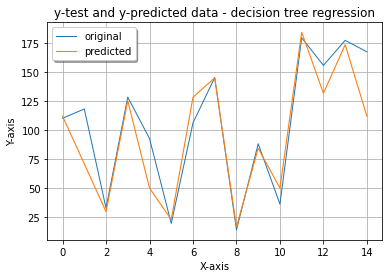

In [ ]:
x_ax_DTR = range(len(ytest_DTR))
plt.plot(x_ax_DTR, ytest_DTR, linewidth=1, label="original")
plt.plot(x_ax_DTR, ypred_DTR, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data - decision tree regression")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

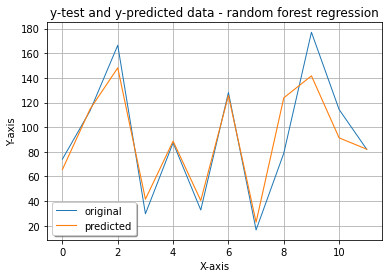

In [ ]:
x_ax_RFR = range(len(ytest_RFR))
plt.plot(x_ax_RFR, ytest_RFR, linewidth=1, label="original")
plt.plot(x_ax_RFR, ypred_RFR, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data - random forest regression")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
from sklearn.ensemble import VotingRegressor

In [ ]:
er = VotingRegressor([('DTR',regressor),('RFR',rfr)])

In [ ]:
er.fit(x,y)
score_er = er.score(x, y)
ypred_er = er.predict(x)
mse_er = mean_squared_error(y, ypred_er)
rmse_er = mean_absolute_error(y, ypred_er)
print("R-squared:", score_er)
print('MSE: ', mse_er)
print('RMSE: ', rmse_er)

R-squared: 0.9913489040193093
MSE:  16.447809293776036
RMSE:  3.045853476883111


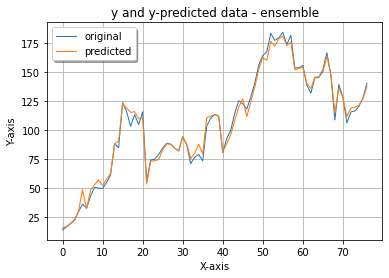

In [ ]:
x_ax_er = range(len(y))
plt.plot(x_ax_er, y, linewidth=1, label="original")
plt.plot(x_ax_er, ypred_er, linewidth=1.1, label="predicted")
plt.title("y and y-predicted data - ensemble")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 